In [17]:
pip install matplotlib seaborn
# purpose:  It provides a high-level interface for drawing attractive and informative statistical graphics.

Note: you may need to restart the kernel to use updated packages.


In [18]:
!pip install matplotlib seaborn
#Purpose: A low-level graph plotting library for creating static, animated, and interactive visualizations.

In [19]:
pip install hSpy
# hyperSpy (hSpy) is an open-source Python library designed for the analysis of multidimensional datasets, commonly encountered in fields like microscopy and spectroscopy. Its main purpose is to facilitate the exploration, visualization, and analysis of complex data such as hyperspectral images, electron microscopy data, and spectroscopic measurements. The toolkit provides efficient handling of large datasets and offers tools for various analytical tasks, including curve fitting and blind source separation.

In [23]:
pip install opencv-pythonOpenCV 
# Function - Image manipulation, including filtering, transformation, and analysis. It allows operations like smoothing, sharpening, edge detection, and thresholding.

In [24]:
pip install tensorflow
#open source ML Framework
#Used here to build neural network & data pre-processing - Resizing images to a uniform size, normalizing pixel values, or augmenting images (flipping, rotating) to increase the dataset size.

Note: you may need to restart the kernel to use updated packages.


In [25]:
pip install --upgrade scikit-learn
# open source python library for ML
# used for Image classification
# Here I've used it due to it's simplicity  and easy of use 
# It has helped in rapid prototyping & test of the ML model

Note: you may need to restart the kernel to use updated packages.


In [26]:
import matplotlib.pyplot as plt

In [27]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [28]:
from sklearn.metrics import classification_report

In [29]:
import os  
import hSpy 
import warnings 
import itertools 
warnings.filterwarnings('ignore') 
import cv2 as cv #resize on reshape 
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from tensorflow.keras import models
from keras.utils import to_categorica1 #Converts a class vector (integers) to binary class matrix.
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten #cnn Layers
from tensorflow.keras.optimizers import Adam 
from tensorflow.keras import losses
from tensorflow.keras import metrics
from tensorflow.keras.models import Sequential 
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split 
from sklearn.metrics import classification_report 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import confusion_matrix

ModuleNotFoundError: No module named 'hSpy'

In [30]:
train_dir = 'C:/Users/srush/OneDrive/Documents/dataset/train'
val_dir = 'C:/Users/srush/OneDrive/Documents/dataset/val'
# defined the directory paths

In [31]:
import os

# Set the paths to your dataset directories
train_dir = r'C:\Users\srush\OneDrive\Documents\dataset\train'
val_dir = r'C:\Users\srush\OneDrive\Documents\dataset\val'

# Check if the training directory exists and list the class labels
if os.path.exists(train_dir):
    class_labels = os.listdir(train_dir)  # Get the class labels (folder names)
    print(class_labels)  # Print the class labels
else:
    print(f"Directory {train_dir} does not exist.")
    
#checks if the training directory exists

['elephant', 'panda', 'tiger']


In [32]:
train_total = 0
for label in class_labels:
    total = len(os.listdir(os.path.join(train_dir, label)))
    
    # Option 1: Using f-string (Python 3.6 and above)
    print(f"{label}: {total}")

    # Option 2: Using string concatenation
    # print(label + ': ' + str(total))

    train_total += total
    print('Total-----', train_total)
    
# I've counted the number of images in the directory
# Then displayed it using the for loop
#This is done to verify the distribution of images across classes and to get the overall number of training samples, which is important for balancing the dataset and assessing its size.

elephant: 89
Total----- 89
panda: 119
Total----- 208
tiger: 159
Total----- 367


In [33]:
# Count training samples
train_total = 0
for label in class_labels:
    total = len(os.listdir(os.path.join(train_dir, label)))
    print(f"{label}: {total}")  # Print the number of training samples for each class
    train_total += total

print('Total training samples:', train_total)

# Count validation samples
val_total = 0
if os.path.exists(val_dir):
    val_labels = os.listdir(val_dir)  # Get the class labels for validation
    for label in val_labels:
        total = len(os.listdir(os.path.join(val_dir, label)))
        print(f"{label}: {total}")  # Print the number of validation samples for each class
        val_total += total

print('Total validation samples:', val_total)

# Now you can define the number of samples and other parameters
nb_train_samples = train_total
nb_val_samples = val_total
num_classes = len(class_labels)  # Update num_classes based on the actual number of class folders
img_rows = 128
img_cols = 128
channel = 3


elephant: 89
panda: 119
tiger: 159
Total training samples: 367
elephant: 89
panda: 119
tiger: 159
Total validation samples: 367


In [34]:
import numpy as np
from keras.preprocessing import image  # Ensure you have this import
from tensorflow.keras.utils import to_categorical  # Use this import instead of np_utils

X_train = []
Y_train = []
j = 0  # Initialize the class index


for label in class_labels:
    image_names_train = os.listdir(os.path.join(train_dir, label))
    total = len(image_names_train)
    print(label, total)
    
    for img_name in image_names_train:  # Use a consistent variable name
        try:
            # Correct the image loading line
            img = image.load_img(os.path.join(train_dir, label, img_name), target_size=(img_rows, img_cols))
            img = image.img_to_array(img)
            img = img / 255.0  # Ensure correct normalization
            
            X_train.append(img)
            Y_train.append(j)  # Append the class index
        except Exception as e:
            print(f"Error loading image {img_name}: {e}")  # Print the error if there's an issue

    j += 1  # Increment class index

# Convert to numpy arrays
X_train = np.array(X_train)
Y_train = np.array(Y_train)

# Convert labels to one-hot encoding using to_categorical
Y_train = to_categorical(Y_train, num_classes)

# Loaded images & labels 
# Images are stored in X-train & Y_train
# the lists X_train and Y_train are converted to NumPy arrays for compatibility with TensorFlow/Keras

elephant 89
Error loading image 10.png.txt: cannot identify image file <_io.BytesIO object at 0x000001D18DD421B0>
Error loading image 24px.svg: cannot identify image file <_io.BytesIO object at 0x000001D1863A5AD0>
Error loading image image (1).svg: cannot identify image file <_io.BytesIO object at 0x000001D18DD40450>
Error loading image image (10).svg: cannot identify image file <_io.BytesIO object at 0x000001D1863A5AD0>
Error loading image image (11).svg: cannot identify image file <_io.BytesIO object at 0x000001D18DD40450>
Error loading image image (12).svg: cannot identify image file <_io.BytesIO object at 0x000001D1863A5AD0>
Error loading image image (13).svg: cannot identify image file <_io.BytesIO object at 0x000001D18DD40450>
Error loading image image (14).svg: cannot identify image file <_io.BytesIO object at 0x000001D1863A5AD0>
Error loading image image (15).svg: cannot identify image file <_io.BytesIO object at 0x000001D18DD40450>
Error loading image image (16).svg: cannot id

C:\Users\srush\anaconda3\Lib\site-packages\PIL\Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Error loading image image (3).svg: cannot identify image file <_io.BytesIO object at 0x000001D1863A5AD0>
Error loading image image (4).svg: cannot identify image file <_io.BytesIO object at 0x000001D1863A5AD0>
Error loading image image (5).svg: cannot identify image file <_io.BytesIO object at 0x000001D1863A5AD0>
Error loading image image (6).svg: cannot identify image file <_io.BytesIO object at 0x000001D1863A5AD0>
Error loading image image (7).svg: cannot identify image file <_io.BytesIO object at 0x000001D1863A5AD0>
Error loading image image (8).svg: cannot identify image file <_io.BytesIO object at 0x000001D18DD40950>
Error loading image image (9).svg: cannot identify image file <_io.BytesIO object at 0x000001D1863A5AD0>
Error loading image image.svg: cannot identify image file <_io.BytesIO object at 0x000001D18D5F7510>
Error loading image mspin_googcolor_medium.svg: cannot identify image file <_io.BytesIO object at 0x000001D1863A5AD0>
panda 119
Error loading image 24px.svg: cannot

In [35]:
import os
import numpy as np
from keras.preprocessing import image
from tensorflow.keras.utils import to_categorical

# Define your class labels (adjust to match your actual classes)
class_labels = ['tiger', 'elephant', 'panda']
num_classes = len(class_labels)

# Set the dimensions of your images
img_rows, img_cols = 224, 224  # For example, 224x224 pixels

# Define your validation directory (update this path)
val_dir = r'C:\Users\srush\OneDrive\Documents\dataset\val'  # Use raw string or escaped backslashes

X_test = []
y_test = []
j = 0  # Initialize the class index

# Check if the validation directory exists
if not os.path.exists(val_dir):
    print(f"Validation directory does not exist: {val_dir}")
else:
    for label in class_labels:
        class_dir = os.path.join(val_dir, label)
        if not os.path.exists(class_dir):
            print(f"Class directory does not exist: {class_dir}")
            continue  # Skip this class if it doesn't exist

        image_names_val = os.listdir(class_dir)
        total = len(image_names_val)
        print(label, total)

        for img_name in image_names_val:
            try:
                # Load and process the image
                img = image.load_img(os.path.join(class_dir, img_name), target_size=(img_rows, img_cols))
                img = image.img_to_array(img)
                img = img / 255.0  # Normalize the image

                X_test.append(img)
                y_test.append(j)  # Append the class index
            except Exception as e:
                print(f"Error loading image {img_name}: {e}")

        j += 1  # Increment class index

# Convert to numpy arrays
X_test = np.array(X_test)
y_test = np.array(y_test)

# Convert labels to one-hot encoding
y_test = to_categorical(y_test, num_classes)

# Print shapes to verify
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)


tiger 159
Error loading image 002-2.png.txt: cannot identify image file <_io.BytesIO object at 0x000001D18DE4D710>
Error loading image 1683177118_Tiger_Drishti_IAS_English.png.txt: cannot identify image file <_io.BytesIO object at 0x000001D1859C3BF0>
Error loading image 24px.svg: cannot identify image file <_io.BytesIO object at 0x000001D1859C3BF0>
Error loading image 5568.jpg: cannot identify image file <_io.BytesIO object at 0x000001D1859C3BF0>
Error loading image amur-tiger-01-01.jpg: cannot identify image file <_io.BytesIO object at 0x000001D1859C3BF0>
Error loading image amur-tiger-walking-in-river-water-danger-animal-tajga-russia.jpg: cannot identify image file <_io.BytesIO object at 0x000001D1859C3BF0>
Error loading image bengal-tiger-on-a-tree-wildlife-shot.jpg: cannot identify image file <_io.BytesIO object at 0x000001D1859C3BF0>
Error loading image Bengal-tiger.jpg: cannot identify image file <_io.BytesIO object at 0x000001D1859C3BF0>
Error loading image https-__cloudfront-us

In [36]:
print(X_train.shape, Y_train.shape, X_test.shape, y_test.shape)

(267, 128, 128, 3) (267, 3) (267, 224, 224, 3) (267, 3)


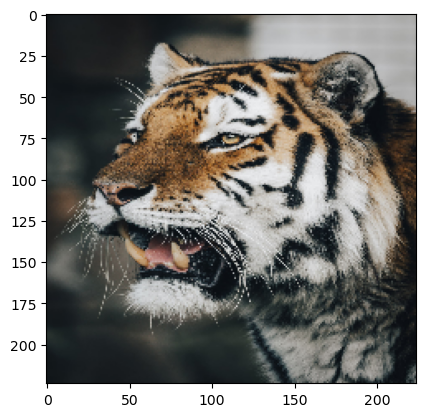

In [37]:
plt.imshow(X_test[25])

# plt.imshow: This function from Matplotlib is used to display an image.
# X_test[25]: This refers to the 26th image (since Python uses zero-based indexing) in the X_test dataset, which is typically a NumPy array representing pixel values of images.

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing import image 
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential  # Importing Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten  # Import necessary layers

# (Assuming the code for loading images into X_train, Y_train, X_test, and y_test is already here)

# Create the model
model = Sequential()

# Add layers to the model (example structure)
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(img_rows, img_cols, channel)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))  # Output layer


C:\Users\srush\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [39]:
from keras.optimizers import Adam

model.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(learning_rate=0.001),  # Use 'learning_rate' instead of 'lr'
    metrics=['accuracy']
)


In [40]:
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing import image
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import Adam  # Importing Adam

# (Assuming the code for loading images into X_train, Y_train, X_test, and y_test is already here)

# Create the model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(img_rows, img_cols, channel)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))  # Output layer

# Compile the model
model.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(learning_rate=0.001, decay=1e-04),  # Fixed the misspelling of 'optimizer'
    metrics=['accuracy']
)


C:\Users\srush\anaconda3\Lib\site-packages\keras\src\optimizers\base_optimizer.py:86: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


In [41]:
 model.summary()
# provide overview of the model's architecture
# shows the layers in the model , name , types & configurations 
# it's an essential practice , as it helps in verifying the architecture & understanding the number of parameters being optimized during training.

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 394272)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │    50,466,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,468,227 (192.52 MB)

 Trainable params: 50,468,227 (192.52 MB)

 Non-trainable params: 0 (0.00 B)

In [42]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten


In [43]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

#  Convolutional Neural Network (CNN) model learn patterns from data (like images). But before it can start learning, you need to tell the model how to learn, what to aim for, and how to measure its progress. That’s what the model.compile() line does.

# Helps in preparing a CNN model for training 
# It adapts the learning rate for each parameter, which can lead to faster convergence and improved performance.
# The optimizer is the algorithm used to update the model's weights during training
# Adam (short for Adaptive Moment Estimation)

# The loss function measures how well the model's predictions match the actual labels of the training data.

# categorical crossentropy is used because  model is doing multi-class classification—it’s trying to choose between several different categories (like different animals in your case: tiger, elephant, panda).

In [44]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten

# Sequential: A linear stack of layers, where each layer has one input and one output.
# Conv2D: A convolutional layer(The main job of this layer is to detect patterns like edges, textures, or specific shapes in different regions of the image.) for processing image data.
# Dense: A fully connected layer.
# Flatten: Converts multi-dimensional input (e.g., images) into a 1D vector for the fully connected layer.

# Dummy data for example
X = np.random.rand(100, 64, 64, 3)  # 100 samples of 64x64 RGB images
Y = np.random.randint(0, 2, (100, 1))  # Binary classification
Y = np.hstack((1 - Y, Y))  # Convert to one-hot encoding

# Create a simple model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(Flatten())
model.add(Dense(2, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Fit the model
hist = model.fit(
    x=X,
    y=Y,
    batch_size=16,
    epochs=10,
    validation_split=0.2,  # Split part of the data for validation
    shuffle=True
)

Epoch 1/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 153ms/step - accuracy: 0.4559 - loss: 3.0461 - val_accuracy: 0.5000 - val_loss: 1.0220
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.5028 - loss: 0.9978 - val_accuracy: 0.5000 - val_loss: 1.9586
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.7224 - loss: 0.5128 - val_accuracy: 0.5000 - val_loss: 0.9160
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.9286 - loss: 0.2409 - val_accuracy: 0.5000 - val_loss: 1.3115
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 1.0000 - loss: 0.0831 - val_accuracy: 0.5000 - val_loss: 1.1020
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 1.0000 - loss: 0.0227 - val_accuracy: 0.4500 - val_loss: 0.7534
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 1.0000 - loss: 0.0214 - val_accuracy: 0.4000 - val_loss: 0.7642
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 1.0000 - loss: 0.0067 - val_accuracy: 0.5000 - val_loss: 1.3730

In [45]:
print("X_train shape:", X_train.shape)  # Should be (num_samples, img_rows, img_cols, num_channels)
print("Y_train shape:", Y_train.shape)  # Should be (num_samples, num_classes)
print("X_test shape:", X_test.shape)     # Should match the shape of X_train
print("y_test shape:", y_test.shape)     # Should match the shape of Y_train


X_train shape: (267, 128, 128, 3)
Y_train shape: (267, 3)
X_test shape: (267, 224, 224, 3)
y_test shape: (267, 3)


In [46]:
print("X_train shape:", X_train.shape)  # Should be (num_samples, img_rows, img_cols, num_channels)
print("Y_train shape:", Y_train.shape)  # Should be (num_samples, num_classes)
print("X_test shape:", X_test.shape)     # Should match the shape of X_train
print("y_test shape:", y_test.shape)     # Should match the shape of Y_train


X_train shape: (267, 128, 128, 3)
Y_train shape: (267, 3)
X_test shape: (267, 224, 224, 3)
y_test shape: (267, 3)


In [47]:
Y_pred = model.predict(X_test, batch_size=1, verbose=0)

ValueError: Exception encountered when calling Sequential.call().

[1mInput 0 of layer "dense_6" is incompatible with the layer: expected axis -1 of input shape to have value 123008, but received input with shape (1, 1577088)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(1, 224, 224, 3), dtype=float32)
  • training=False
  • mask=None

In [48]:
# Assuming your model is already trained

# Get predictions from the model using the test set
y_pred = model.predict(X_test)  # This will create y_pred

# Initialize the list for predicted labels
Y_predict = []
for i in range(len(y_pred)):  # No need to specify the start of range as 0
    Y_predict.append(int(np.argmax(y_pred[i])))  # Append the predicted class index

# Print the length of Y_predict
print(len(Y_predict))


ValueError: Exception encountered when calling Sequential.call().

[1mInput 0 of layer "dense_6" is incompatible with the layer: expected axis -1 of input shape to have value 123008, but received input with shape (32, 1577088)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(32, 224, 224, 3), dtype=float32)
  • training=False
  • mask=None

In [58]:
# Assuming y_test has been defined previously as one-hot encoded labels
Y_true = []
for i in range(len(y_test)):  # Ensure you use y_test, not Y_test
    Y_true.append(int(np.argmax(y_test[i])))  # Convert one-hot encoding to class index

# Print the length of Y_true
print(len(Y_true))


267


In [59]:
import numpy as np
import matplotlib.pyplot as plt
import itertools

def plot_confusion_matrix(cm, classes, 
                          title='Confusion Matrix',
                          cmap=plt.cm.Blues):  # Ensure correct color map name
    plt.figure(figsize=(15, 7))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)  # Fixed the method name
    plt.title(title)
    plt.colorbar()

    tick_marks = np.arange(len(classes))  # Corrected the np.arange call
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd'
    thresh = cm.max() / 2  # Use cm.max() to get the max value in the confusion matrix
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):  # Corrected loop parameters
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('Actual Label')
    plt.xlabel('Predicted Label')
    plt.tight_layout()
    plt.show()


In [60]:
cm_plot_labels = class_labels

In [61]:
from sklearn.metrics import classification_report

In [62]:
from sklearn.metrics import classification_report

print(classification_report(Y_true, Y_predict))


NameError: name 'Y_predict' is not defined

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step


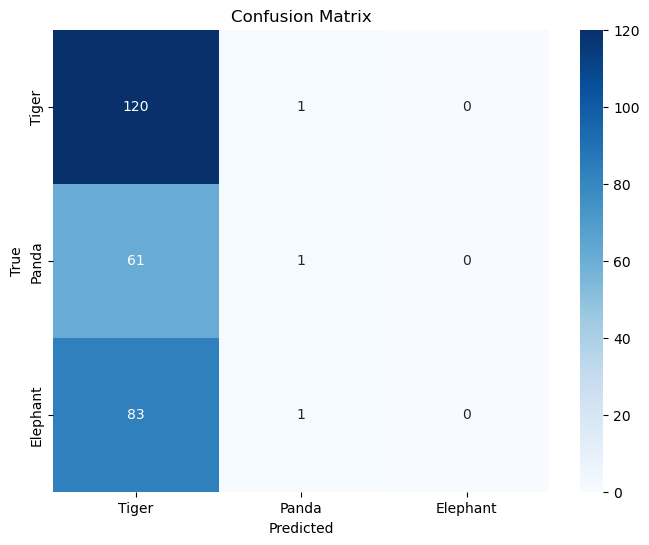

In [63]:

import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have a model and test data
# X_test = ... (Your test data)
# y_true = ... (Your true labels)

# Generate predictions
y_predict = model.predict(X_test)
y_predict = np.argmax(y_predict, axis=1)  # If you have one-hot encoded labels

# Create confusion matrix
cm = confusion_matrix(Y_true, y_predict)

# Function to plot confusion matrix
def plot_confusion_matrix(cm, labels, title='Confusion Matrix'):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(title)
    plt.show()
# Assuming you have defined your class labels
cm_plot_labels = ['Tiger', 'Panda', 'Elephant']  # Update this with your actual labels

# Plot the confusion matrix
plot_confusion_matrix(cm, cm_plot_labels, title='Confusion Matrix')

# The confusion matrix will show you how many times each class (e.g., Tiger, Panda, Elephant) was correctly or incorrectly predicted by the model.


In [ ]:
pip install scikit-learn

In [ ]:
pip install scikit-learn==1.0.2

In [ ]:
conda create -n myenv python=3.9
conda activate myenv
conda install scikit-learn keras numpy

In [ ]:
print("Test Accuracy: ", score[1], flush=True)

In [ ]:
score = model.evaluate(x=X_test, y=Y_test, batch_size=32)
print("Test Accuracy: ", score[1], flush=True)

In [ ]:
score = model.evaluate(x=X_train, y=Y_train, batch_size=32)
print("Train Accuracy: ", score[1], flush=True)

In [ ]:
from pathlib import Path

# Save the model structure as JSON
model_structure = model.to_json()

# Define the path to save the model structure
f = Path("model/model_structure.json")

# Create the directory if it doesn't exist
f.parent.mkdir(parents=True, exist_ok=True)

# Write the model structure to the file
chars_written = f.write_text(model_structure)

# Display the number of characters written to the file
print("Number of characters written:", chars_written)


In [ ]:
model.save_weights("model/model_weights.weights.h5")